# Tarea 1 - Parte 4
# INF477 Redes Neuronales Artificiales I-2018

Profesor: Dr. Ricardo Ñanculef -- 
Ayudante: Francisco Mena

Alumnos:
- Jose Caimapo, jose.caimapo.12@sansano.usm.cl

- Eliana Providel Godoy, eprovide@inf.utfsm.cl

Using TensorFlow backend.
/anaconda3/envs/redes-neuronales/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


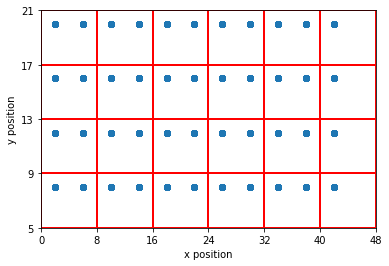

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()

##Problema de clasificación

## Son 24 clases o categorias
### softmax
### 24 neuronas en la capa de salida
### 8 neuronas en la capa de entrada
### que falta decidir?
## cuantas capas ocultas: por defecto 2?
## cuantas neuronas por cada capa oculta?
## cual es la funcion de activacion de cada capa oculta? --> relu / sigmoid / tanh
## otros parametros:
# - loss function
# - numero de epochs
# - learning rate
# - etc?

### Por hacer
# discretizar los datos de entrenamiento

In [3]:
mask_test = np.loadtxt('mask_test.csv',dtype="i")
#mask_test
X = df.values

X_df = pd.DataFrame(X, columns=df.columns)

## Coinciden los puntos/zonas con los ejemplos del enunciado
## (2, 8) -> zona 1 
## (2,20) -> zona 19
## Vamos a hacer la discretizacion desde la zona 0 hasta la 23 para que calce
## con el indexamiento de arreglos

## Discretizacion para determinar zona X
X_df['ZONA_X'] = X_df['X'].apply(lambda x: np.floor(x/8) + 1)

## Discretizacion para determinar zona Y
X_df['ZONA_Y'] = X_df['Y'].apply(lambda y: np.floor((y-5)/4) + 1)

## Discretizacion de posiciones ZONA_X + (6*(ZONA_Y - 1))
X_df['ZONA'] = X_df.apply(lambda row: row['ZONA_X'] + 6 * (row['ZONA_Y'] - 1) - 1 ,axis=1)

X_df.drop(['X', 'Y', 'ZONA_X', 'ZONA_Y'], axis=1, inplace=True)

##########
### Valores con la zona discretizada pero sin separacion entre train y test
Y = X_df['ZONA'].values
X_df.drop(['ZONA'], axis=1, inplace=True)
X = X_df.values


In [4]:
### Division de los datos en train y test
X_test  = X[mask_test]
X_train = np.delete(X, mask_test, axis=0)

y_test  = Y[mask_test]
y_train = np.delete(Y, mask_test, axis=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_df.columns)

## hay que escalar X_test -- 
scaler2 = StandardScaler().fit(X_test)
X_test_scaled = pd.DataFrame(scaler2.transform(X_test), columns=X_df.columns)

from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=24)
y_test_onehot = to_categorical(y_test, num_classes=24)


** Revisando los valores conjuntos de datos que se utilizarán**

In [18]:
X_train_scaled.columns
y_train_onehot
X_test_scaled.columns
y_test_onehot

len(X_train_scaled)
len(y_train_onehot)
len(X_test_scaled)
len(y_test_onehot)

Index(['C1hA', '0kxZ', 'tvMX', 'OlYb', '7rk5', 'F39L', 'VNSF', 'tkxI'], dtype='object')

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Index(['C1hA', '0kxZ', 'tvMX', 'OlYb', '7rk5', 'F39L', 'VNSF', 'tkxI'], dtype='object')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

4620

4620

1980

1980

In [5]:
model = Sequential()

model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))

model.add(Dense(200, kernel_initializer='uniform'))
model.add(Activation('relu'))

model.add(Dense(24, kernel_initializer='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
loss_function = 'categorical_crossentropy'
model.compile(optimizer=sgd,loss=loss_function, metrics=["accuracy"])

In [6]:
hist = model.fit(X_train_scaled.as_matrix(), y_train_onehot, epochs=100, verbose=1, 
                 validation_data=(X_test_scaled.as_matrix(), y_test_onehot))

Train on 4620 samples, validate on 1980 samples
Epoch 1/100
4620/4620 [==============================] - 1s 121us/step - loss: 3.1766 - acc: 0.0381 - val_loss: 3.1734 - val_acc: 0.0722
Epoch 2/100
4620/4620 [==============================] - 1s 119us/step - loss: 3.1701 - acc: 0.1470 - val_loss: 3.1674 - val_acc: 0.1652
Epoch 3/100
4620/4620 [==============================] - 1s 152us/step - loss: 3.1639 - acc: 0.1740 - val_loss: 3.1613 - val_acc: 0.2051
Epoch 4/100
4620/4620 [==============================] - 1s 136us/step - loss: 3.1575 - acc: 0.2223 - val_loss: 3.1549 - val_acc: 0.2071
Epoch 5/100
4620/4620 [==============================] - 1s 136us/step - loss: 3.1506 - acc: 0.2063 - val_loss: 3.1478 - val_acc: 0.2091
Epoch 6/100
4620/4620 [==============================] - 1s 131us/step - loss: 3.1428 - acc: 0.2154 - val_loss: 3.1395 - val_acc: 0.1944
Epoch 7/100
4620/4620 [==============================] - 1s 109us/step - loss: 3.1335 - acc: 0.2011 - val_loss: 3.1293 - val_acc: 

4620/4620 [==============================] - 0s 107us/step - loss: 0.6477 - acc: 0.7957 - val_loss: 0.6597 - val_acc: 0.7970
Epoch 61/100
4620/4620 [==============================] - 0s 107us/step - loss: 0.6408 - acc: 0.8006 - val_loss: 0.6550 - val_acc: 0.7975
Epoch 62/100
4620/4620 [==============================] - 0s 106us/step - loss: 0.6319 - acc: 0.8022 - val_loss: 0.6388 - val_acc: 0.7970
Epoch 63/100
4620/4620 [==============================] - 0s 105us/step - loss: 0.6232 - acc: 0.8056 - val_loss: 0.6336 - val_acc: 0.8040
Epoch 64/100
4620/4620 [==============================] - 0s 105us/step - loss: 0.6177 - acc: 0.8087 - val_loss: 0.6349 - val_acc: 0.7949
Epoch 65/100
4620/4620 [==============================] - 0s 103us/step - loss: 0.6098 - acc: 0.8106 - val_loss: 0.6228 - val_acc: 0.8066
Epoch 66/100
4620/4620 [==============================] - 0s 107us/step - loss: 0.6026 - acc: 0.8123 - val_loss: 0.6113 - val_acc: 0.8131
Epoch 67/100
4620/4620 [=======================

In [7]:
## Función para gráficar
import matplotlib.pyplot as plt
def plot_data(loss,val_loss,acc,val_acc,error_class,val_error_class ,title1, title2,title3):
    plt.close('all')

    f, axarr = plt.subplots(3, sharex=True,figsize=(10,10))
    axarr[0].set_title(title1)
    axarr[0].plot(loss)
    axarr[0].plot(val_loss)
    axarr[0].set_xlabel('epoch')
    axarr[0].set_ylabel(loss_function)
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[1].set_title(title2)
    axarr[1].plot(acc)
    axarr[1].plot(val_acc)
    axarr[1].set_xlabel('epoch')
    axarr[1].set_ylabel('acc')
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[2].set_title(title3)
    axarr[2].plot(error_class)
    axarr[2].plot(val_error_class)
    axarr[2].set_xlabel('epoch')
    axarr[2].set_ylabel('1-acc')
    #plt.ylim(ymin=0, ymax=1)

    axarr[2].legend(['train', 'test'], loc='upper right')
    axarr[1].legend(['train', 'test'], loc='upper right')
    axarr[0].legend(['train', 'test'], loc='upper right')
    
    plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


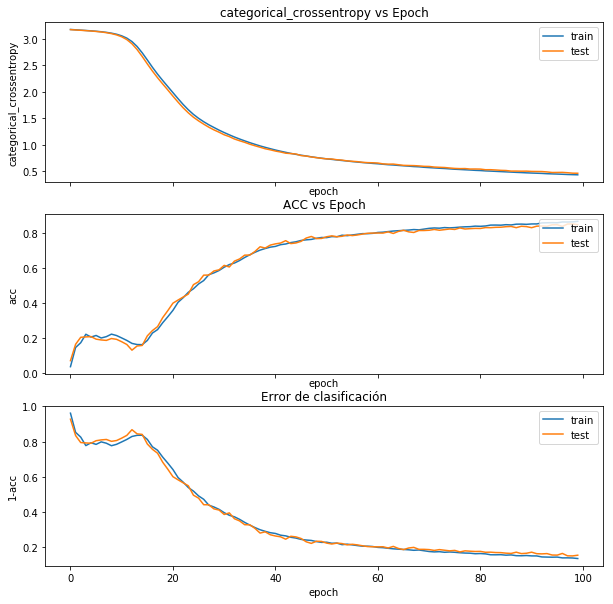

In [8]:
##Los valores de history
print(hist.history.keys())
print(hist.history.keys())

plot_data(
        hist.history['loss'], #gráfico 1 (mse vs epoch)
        hist.history['val_loss'], 
        hist.history['acc'], #gráfico 2 (acc vs epoch)
        hist.history['val_acc'],
        list(map(lambda x: 1 - x, hist.history['acc'])), #gráfico 3 (error de clasficación)
        list(map(lambda x: 1 - x, hist.history['val_acc'])), loss_function + ' vs Epoch', 'ACC vs Epoch' ,'Error de clasificación'
    )


- Gráfico 1: se oberva claramente como disminuye el error de clasficación a medida que aumenta el número de epochs
- Gráfico 2: Se observa como aumenta accuracy a medida que aumenta el número de epochs. Con la configuración acc queda en 0.8636  y val_acc 0.8414
- Gráfico 3: Considerando que 1 cuando la máquina se equivoca y 0 cuando acierta, se gráfica 1-history['acc'], entendiendo esto como el error de clasificación, lo que disminuye a medida que aumenta el número de epochs.